In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as pyplot

In [2]:
colab_path = 'ScadaData.txt'
local_path = 'C:\\Users\\hanna\\Desktop\\data\\ScadaData.txt'

scada_data = pd.read_csv(local_path, delimiter='\t',  parse_dates=True)
scada_data['dtTimeStamp'] = pd.to_datetime(scada_data['dtTimeStamp'])
data = scada_data[['dtTimeStamp','WindSpeedMean','WindDirectionMean', 'intObjectId']].groupby('dtTimeStamp').mean()[['WindSpeedMean','WindDirectionMean']][0:432]
print(data.tail(100))

                     WindSpeedMean  WindDirectionMean
dtTimeStamp                                          
2019-08-03 07:20:00       1.929630          54.974074
2019-08-03 07:30:00       1.677778          56.622222
2019-08-03 07:40:00       1.522222         109.885185
2019-08-03 07:50:00       1.837037         227.481481
2019-08-03 08:00:00       2.125926         323.229630
...                            ...                ...
2019-08-03 23:10:00       4.292593          62.059259
2019-08-03 23:20:00       4.137037          66.174074
2019-08-03 23:30:00       4.225926          66.962963
2019-08-03 23:40:00       4.188889          69.474074
2019-08-03 23:50:00       4.451852          74.362963

[100 rows x 2 columns]


In [4]:
from statsmodels.tsa.arima_model import ARIMA
import datetime as dt

def get_predictions(data, column_name):
    X = data[[column_name]]
    size = int(len(X) * 0.04)
    train, test = X[0:size], X[size:len(X)]
    history = train
    predictions = pd.DataFrame(index=test.index, columns=[column_name])
    for i, row in test.iterrows():
        model = ARIMA(history, order=(1,1,0))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0].flatten()[0]
        predictions.loc[i][column_name] = yhat
        history.loc[i] = row[column_name]
    
    return predictions


wind_speed_predictions = get_predictions(data, 'WindSpeedMean')
wind_direction_predictions = get_predictions(data, 'WindDirectionMean')

all_predictions = pd.concat([wind_speed_predictions, wind_direction_predictions], axis='index')
print(all_predictions)


C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'
C:\Users\hanna\Anaconda3\envs\dissertati

                    WindSpeedMean WindDirectionMean
dtTimeStamp                                        
2019-08-01 02:50:00       6.11062               NaN
2019-08-01 03:00:00       6.39072               NaN
2019-08-01 03:10:00       6.27535               NaN
2019-08-01 03:20:00       6.49482               NaN
2019-08-01 03:30:00       5.83554               NaN
...                           ...               ...
2019-08-03 23:10:00           NaN           60.0379
2019-08-03 23:20:00           NaN           62.3152
2019-08-03 23:30:00           NaN           66.7637
2019-08-03 23:40:00           NaN           67.0858
2019-08-03 23:50:00           NaN           69.8444

[830 rows x 2 columns]


C:\Users\hanna\Anaconda3\envs\dissertation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  warnings.warn('No frequency information was'


In [5]:
all_predictions = pd.concat([wind_speed_predictions, wind_direction_predictions], axis=1)
print(all_predictions)

                    WindSpeedMean WindDirectionMean
dtTimeStamp                                        
2019-08-01 02:50:00       6.11062           80.0097
2019-08-01 03:00:00       6.39072           79.2102
2019-08-01 03:10:00       6.27535              81.3
2019-08-01 03:20:00       6.49482           79.7453
2019-08-01 03:30:00       5.83554           83.5325
...                           ...               ...
2019-08-03 23:10:00       4.46087           60.0379
2019-08-03 23:20:00       4.26554           62.3152
2019-08-03 23:30:00        4.1149           66.7637
2019-08-03 23:40:00       4.24333           67.0858
2019-08-03 23:50:00       4.18598           69.8444

[415 rows x 2 columns]


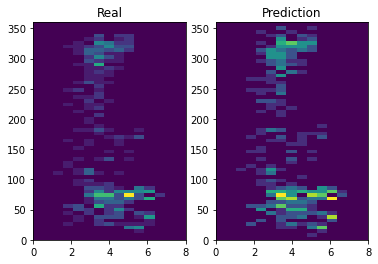

In [12]:
x_raw = data['WindSpeedMean']
y_raw = data['WindDirectionMean']
x_pred = all_predictions['WindSpeedMean']
y_pred = all_predictions['WindDirectionMean']

fig, axes = pyplot.subplots(1, 2)
axes[0].hist2d(x_raw, y_raw, bins=(15, 60), range=[[0, 8], [0, 360]])
axes[0].title.set_text('Real')
axes[1].hist2d(x_pred, y_pred, bins=(15, 60), range=[[0, 8], [0, 360]])
axes[1].title.set_text('Prediction')
pyplot.show()
